In [1]:
import pandas as pd
import numpy as np

df_cleaned = pd.read_csv(r'Paccar Cleaned Data - Selected_Features.csv')
df_cleaned = df_cleaned.drop(df_cleaned.columns[0], axis=1)  

## DO NOT RUN THE BELOW, I have pasted the output (because it fits 30 trees in total )

In [3]:
# # Re-import libraries after reset
# import pandas as pd
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

# # Split features and target
# X = df_cleaned.drop(columns=["rhit_label"])
# y = df_cleaned["rhit_label"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define parameter grid for RandomizedSearchCV
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Initialize and search
# rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# random_search_rf = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_grid_rf,
#     n_iter=10,
#     cv=3
#     scoring='f1',
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# random_search_rf.fit(X_train, y_train)

# # Evaluate
# best_rf = random_search_rf.best_estimator_
# y_rf_pred = best_rf.predict(X_test)
# y_rf_prob = best_rf.predict_proba(X_test)[:, 1]

# rf_metrics = {
#     'Precision': precision_score(y_test, y_rf_pred),
#     'Recall': recall_score(y_test, y_rf_pred),
#     'Accuracy': accuracy_score(y_test, y_rf_pred),
#     'ROC AUC': roc_auc_score(y_test, y_rf_prob)
# }

# rf_metrics_df = pd.DataFrame.from_dict(rf_metrics, orient='index', columns=['Random Forest'])
# best_params_df = pd.DataFrame([random_search_rf.best_params_])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


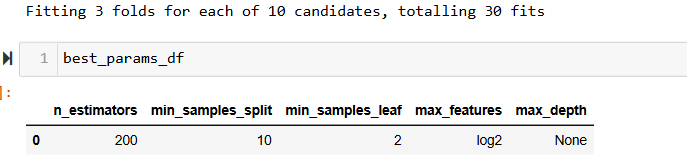

In [7]:
# Re-import libraries after reset
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

# Split features and target
X = df_cleaned.drop(columns=["rhit_label"])
y = df_cleaned["rhit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configure XGBoost with fine-tuned parameters
xgb_model_tuned = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=None,
    min_child_weight=2,
    colsample_bytree=0.7,  # simulating log2 max_features
    subsample=1.0
)

# Train the model
xgb_model_tuned.fit(X_train, y_train)

# Predict and evaluate
y_xgb_tuned_pred = xgb_model_tuned.predict(X_test)
y_xgb_tuned_prob = xgb_model_tuned.predict_proba(X_test)[:, 1]

xgb_tuned_metrics = {
    'Precision': precision_score(y_test, y_xgb_tuned_pred),
    'Recall': recall_score(y_test, y_xgb_tuned_pred),
    'Accuracy': accuracy_score(y_test, y_xgb_tuned_pred),
    'ROC AUC': roc_auc_score(y_test, y_xgb_tuned_prob)
}

xgb_tuned_df = pd.DataFrame.from_dict(xgb_tuned_metrics, orient='index', columns=['XGBoost (Tuned)'])
xgb_tuned_df


C:\Users\sansk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,XGBoost (Tuned)
Precision,0.732771
Recall,0.568756
Accuracy,0.805957
ROC AUC,0.857683


# Final Model - To Work On

In [14]:
# Re-import libraries after reset
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

# Split features and target
X = df_cleaned.drop(columns=["rhit_label"])
y = df_cleaned["rhit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configure XGBoost with fine-tuned parameters
xgb_model_tuned = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=25,
    min_child_weight=2,
    colsample_bytree=0.7,  # simulating log2 max_features
    subsample=1.0
)

# Train the model
xgb_model_tuned.fit(X_train, y_train)

# Predict and evaluate
y_xgb_tuned_pred = xgb_model_tuned.predict(X_test)
y_xgb_tuned_prob = xgb_model_tuned.predict_proba(X_test)[:, 1]

xgb_tuned_metrics = {
    'Precision': precision_score(y_test, y_xgb_tuned_pred),
    'Recall': recall_score(y_test, y_xgb_tuned_pred),
    'Accuracy': accuracy_score(y_test, y_xgb_tuned_pred),
    'ROC AUC': roc_auc_score(y_test, y_xgb_tuned_prob)
}

xgb_tuned_df = pd.DataFrame.from_dict(xgb_tuned_metrics, orient='index', columns=['XGBoost (Tuned)'])
xgb_tuned_df


C:\Users\sansk\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,XGBoost (Tuned)
Precision,0.775272
Recall,0.647039
Accuracy,0.835775
ROC AUC,0.883977


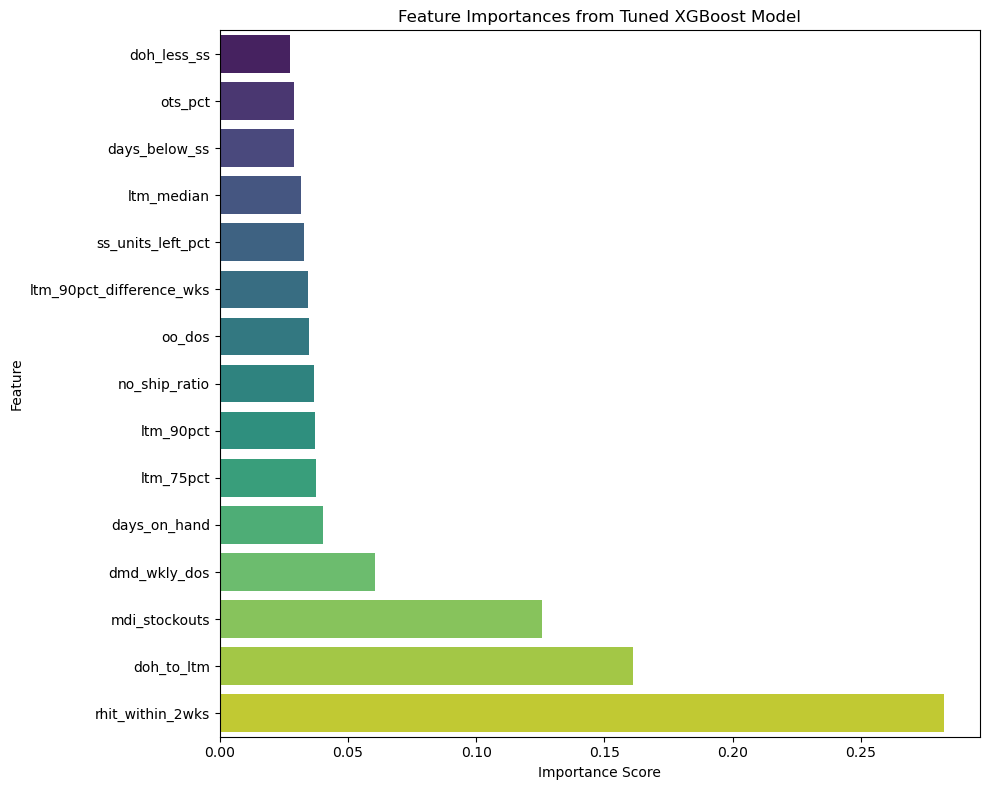

In [15]:
# Plot feature importance from the tuned XGBoost model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract feature importances
feature_importance = pd.Series(xgb_model_tuned.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importances from Tuned XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


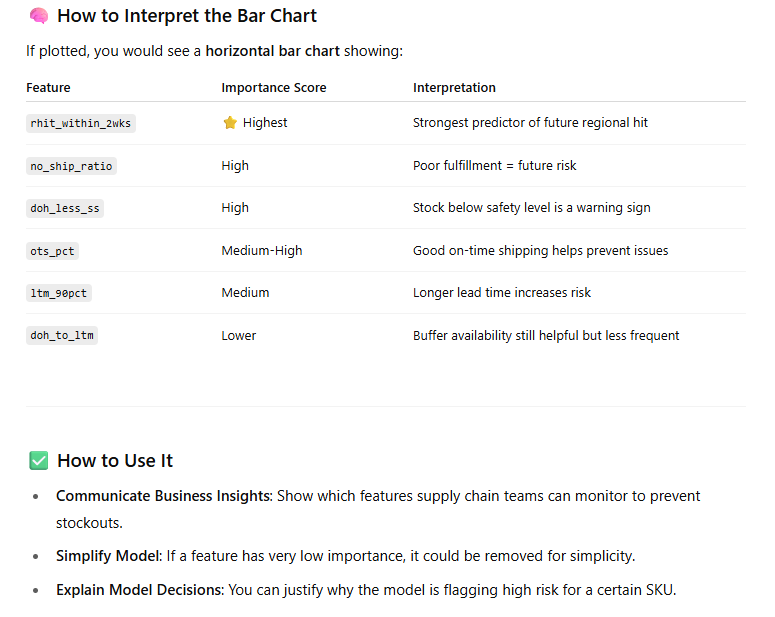